In [54]:
import os
import numpy as np
from tools import analysistools as atools
import pandas as pd
import seaborn as sns

In [11]:
basedir = "/Users/joelforster/Projects/optidb/clus/rebuilds"
csvs = list(filter(lambda x: '.csv' in x, os.listdir(basedir)))

In [52]:
dfcov = pd.DataFrame(columns = []) 
for c in csvs:
    df = pd.read_csv(os.path.join(basedir,c))
    timesteps = df['timestep'].unique().tolist()
    if not 'timestep' in dfcov:
        dfcov['timestep'] = df['timestep'].unique()
    nlist = []
    for t in timesteps:
        step = df[df.timestep == t] 
        mem = step[df.type==1]
        core = step[df.type==2].iloc[0]
        nlist.append(len(mem[mem.apply(lambda x: (x['x']-core['x'])**2 + (x['y']-core['y'])**2 + (x['z']-core['z'])**2 < 36, axis=1)]['id'].unique().tolist()))
    nstep = pd.Series(data=nlist)
    dfcov[c.replace('.csv','')] = nstep
    dfcov.to_csv(os.path.join(basedir,'coverage.csv'),index=False)

/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/joelforster/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


KeyboardInterrupt: 

In [68]:
df = pd.read_csv('/Users/joelforster/Projects/optidb/clus/rebuilds/coverage.csv')

In [82]:
import matplotlib.pyplot as plt
import random
def plot(col):
    sns.lmplot(y=col, x="timestep", data=df)

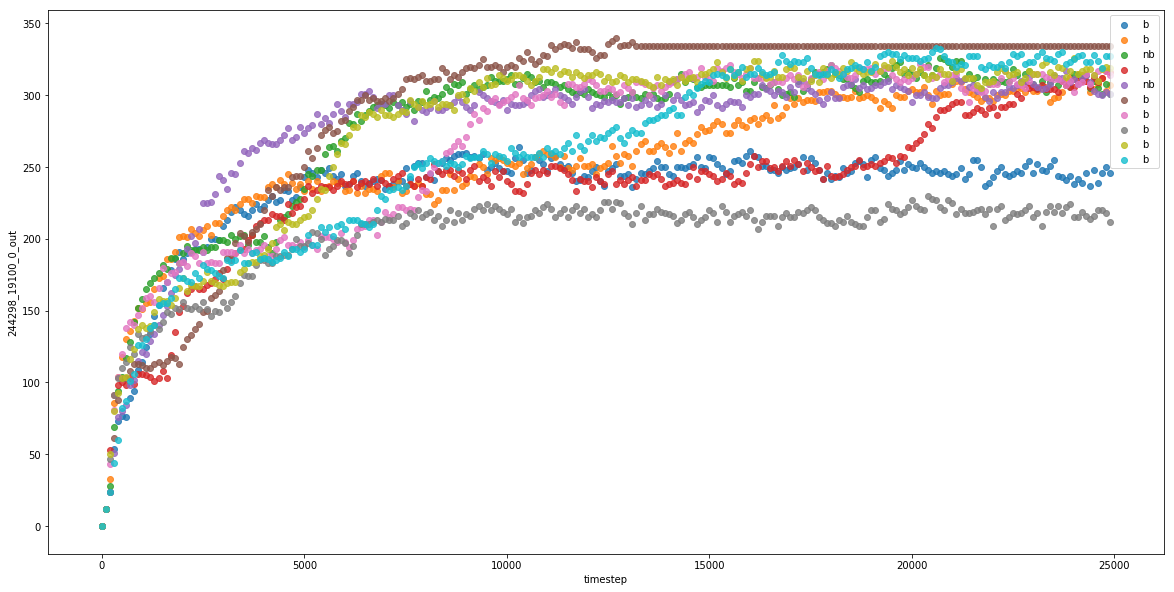

In [100]:
fig = plt.figure(figsize=(20,10))
cols = df.columns.difference(['timestep'])
s = random.sample(cols,10)
for c in s:
    sns.regplot(y=c, x="timestep", data=df,label='nb' if '-1' in c else 'b',fit_reg=False)
plt.legend()
plt.show()

In [101]:
droplist = [i for i in df.columns if '-1' in i]

In [112]:
bdf = df.drop(droplist,axis=1).drop('timestep',axis=1)
ndf = df.drop(bdf.columns,axis=1)

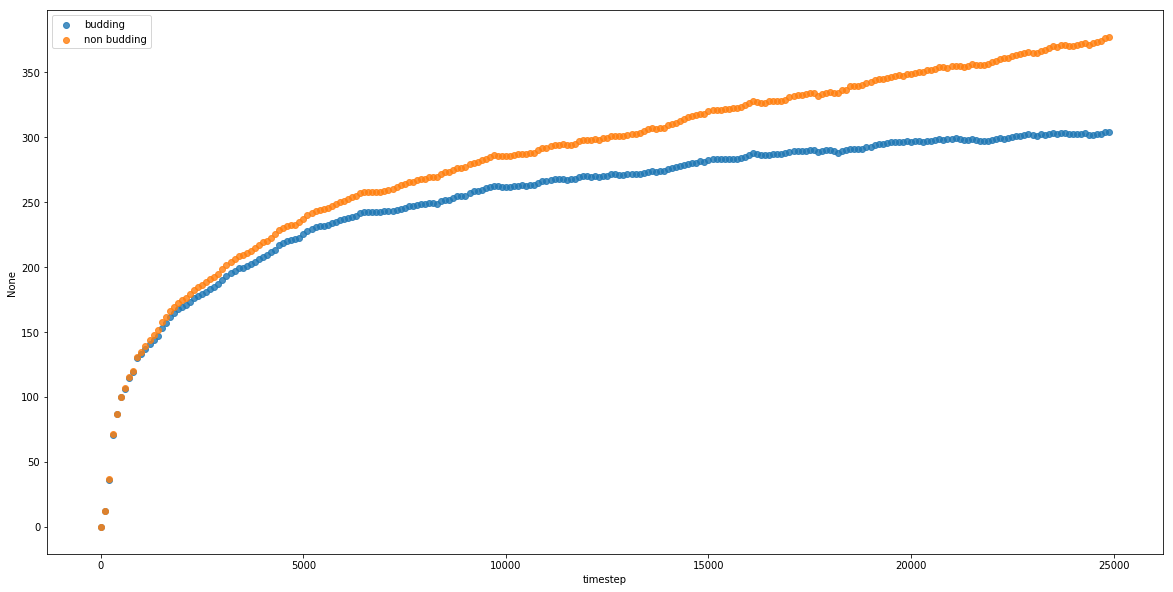

In [122]:
fig = plt.figure(figsize=(20,10))
sns.regplot(y=bdf.mean(axis=1),x=df['timestep'],label='budding',fit_reg=False)
sns.regplot(y=ndf.mean(axis=1),x=df['timestep'],label='non budding',fit_reg=False)
plt.legend()
plt.show()